In [4]:
%load_ext autoreload
%autoreload 2

import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import copy

module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
from pricing.rheston import RoughHeston
from pricing.price_engine import MontelCarloOptionPricingEngine

In [6]:
S = 300
T = 1
r = 0.03

In [7]:
params1 = {
    'mu': r,
    'corr': 0.02,
    'h2': 0.5,

    'v0': 0.0225,
    'v_mr': 2,
    'v_mu': 0.0225,
    'v_vol': 0.3
}

In [8]:
rheston1 = RoughHeston()
rheston1.set_parameters(**params1)

pricer1 = MontelCarloOptionPricingEngine(rheston1)
price1 = pricer1.european_call_option_price(S, S, r, T, size=1001)
print(price1)

Finsihed  100.00%
21.82021672586943


In [20]:
log_Ks = np.linspace(-0.3, 0.15, 50)
Ks = np.exp(log_Ks) * S

In [21]:
implied_vols1, prices1 = pricer1.find_implied_vols(S, Ks, r, T, size=10001, batch_num=10)

Finsihed  100.00%


In [27]:
prices1

array([84.65864464, 82.71411849, 80.7566634 , 78.78695701, 76.80524262,
       74.81247304, 72.80915215, 70.79679282, 68.77611962, 66.74848514,
       64.71607398, 62.67921753, 60.63884047, 58.59638602, 56.55441354,
       54.51372039, 52.47656238, 50.44601698, 48.4235975 , 46.41246747,
       44.41595449, 42.43719519, 40.47846197, 38.54292291, 36.6341005 ,
       34.75577226, 32.9117849 , 31.10538379, 29.34280479, 27.62593917,
       25.95902375, 24.34365119, 22.78144687, 21.27732717, 19.83301226,
       18.45106242, 17.13268167, 15.87916642, 14.69105711, 13.56874699,
       12.50981704, 11.51436279, 10.58332247,  9.71113489,  8.89625929,
        8.13722996,  7.43274304,  6.78175988,  6.18178938,  5.62939778])

In [28]:
implied_vols1

array([0.163539  , 0.16280225, 0.16204243, 0.16127497, 0.16048474,
       0.15969206, 0.15888833, 0.15810422, 0.15732882, 0.15657164,
       0.15586091, 0.15516048, 0.15445647, 0.15374837, 0.1530577 ,
       0.15236117, 0.15166686, 0.15099297, 0.1503247 , 0.14967434,
       0.14905165, 0.14845969, 0.14788804, 0.1473382 , 0.14681454,
       0.14632281, 0.14586817, 0.14544882, 0.14509321, 0.14478538,
       0.14453461, 0.14432716, 0.14415312, 0.14403415, 0.14396588,
       0.14395435, 0.14399741, 0.14409724, 0.14425338, 0.14446781,
       0.14472239, 0.1450233 , 0.14538763, 0.14577882, 0.14619668,
       0.14664396, 0.14712729, 0.14765865, 0.14823825, 0.14885728])

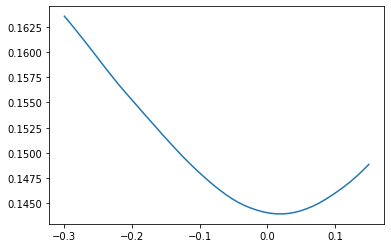

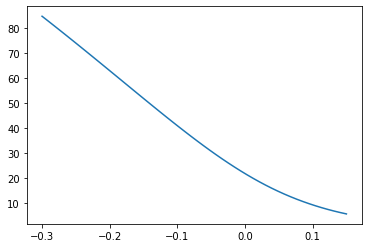

In [22]:
plt.plot(log_Ks, implied_vols1)
plt.show()

plt.plot(log_Ks, prices1)
plt.show()

In [36]:
params2 = {
    'mu': r,
    'corr': 0.02,
    'h2': 0.15,

    'v0': 0.0225,
    'v_mr': 2,
    'v_mu': 0.0225,
    'v_vol': 0.1
}

In [38]:
rheston2 = RoughHeston()
rheston2.set_parameters(**params2)

pricer2 = MontelCarloOptionPricingEngine(rheston2)
price2 = pricer2.european_call_option_price(S, S, r, T, size=1001)
print(price2)

Finsihed  100.00%
16.496255257677102


In [39]:
implied_vols2, prices2 = pricer2.find_implied_vols(S, Ks, r, T, size=10001, batch_num=10)

Finsihed  100.00%


/home/chester/Documents/IC/FYP/FractionalBrownianMotion/pricing/price_engine.py:12: RuntimeWarning: overflow encountered in double_scalars
  d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
/home/chester/Documents/IC/FYP/FractionalBrownianMotion/pricing/price_engine.py:17: RuntimeWarning: overflow encountered in double_scalars
  d1 = (np.log(S/K) + (sigma**2/2)*T) / (sigma*np.sqrt(T))


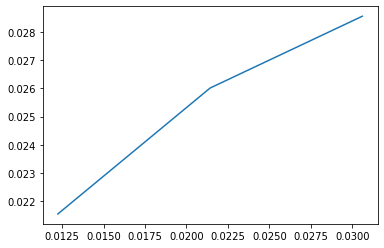

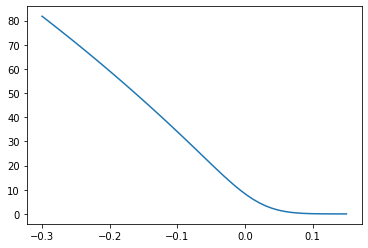

In [40]:
plt.plot(log_Ks, implied_vols2)
plt.show()

plt.plot(log_Ks, prices2)
plt.show()

In [41]:
implied_vols2

array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan, 0.02155139,
       0.02600995, 0.02855308,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan])

In [42]:
prices2

array([8.17761883e+01, 7.97863570e+01, 7.77781677e+01, 7.57514508e+01,
       7.37060355e+01, 7.16417492e+01, 6.95584179e+01, 6.74558659e+01,
       6.53339157e+01, 6.31923885e+01, 6.10311037e+01, 5.88498788e+01,
       5.66485301e+01, 5.44268718e+01, 5.21847165e+01, 4.99218751e+01,
       4.76381568e+01, 4.53333907e+01, 4.30073917e+01, 4.06599901e+01,
       3.82910334e+01, 3.59005012e+01, 3.34889030e+01, 3.10570703e+01,
       2.86069926e+01, 2.61425155e+01, 2.36695719e+01, 2.11985288e+01,
       1.87448087e+01, 1.63310372e+01, 1.39873993e+01, 1.17466430e+01,
       9.64718982e+00, 7.72614242e+00, 6.01796412e+00, 4.54657680e+00,
       3.32715992e+00, 2.35218846e+00, 1.60487032e+00, 1.05519660e+00,
       6.66283718e-01, 4.03613284e-01, 2.33536696e-01, 1.29726555e-01,
       6.90939106e-02, 3.49822965e-02, 1.67967470e-02, 7.94818715e-03,
       3.69591978e-03, 1.64815889e-03])

RFSV: Simulating  90.00% dwh


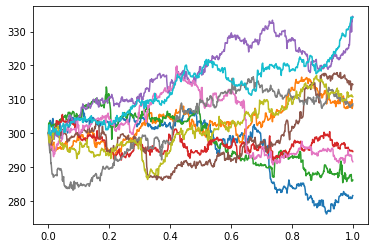

In [33]:
paths2 = rheston2.simulate(S, T, 1001, 10, return_path=True)
for p in paths2:
    plt.plot(np.linspace(0, T, 1001), p)
plt.show()

In [35]:
(prices2 - prices1) / prices1

array([-0.03384227, -0.0351856 , -0.03666669, -0.03830698, -0.04012475,
       -0.04214949, -0.04440813, -0.04694437, -0.04979618, -0.05301515,
       -0.05667146, -0.06081638, -0.06551732, -0.07085929, -0.07695741,
       -0.08391336, -0.09186939, -0.10100365, -0.11149242, -0.12357124,
       -0.13751597, -0.15364284, -0.17230212, -0.19392109, -0.21900347,
       -0.2481278 , -0.28195401, -0.32116432, -0.3664612 , -0.41828203,
       -0.47668953, -0.5410234 , -0.60971204, -0.68020353, -0.7488221 ,
       -0.81209813, -0.86700122, -0.91134299, -0.9446477 , -0.96787458,
       -0.98268356, -0.99135894, -0.99604678, -0.99835881, -0.99939072,
       -0.99980679, -0.99995826, -0.99999478, -1.        , -1.        ])

Calibration

In [43]:
import yfinance as yf
import pandas as pd

In [48]:
spx = yf.Ticker("^SPX")

In [49]:
spx.info

{'exchange': 'WCB',
 'shortName': 'S&P 500 INDEX',
 'exchangeTimezoneName': 'America/New_York',
 'exchangeTimezoneShortName': 'EDT',
 'isEsgPopulated': False,
 'gmtOffSetMilliseconds': '-14400000',
 'underlyingSymbol': '^GSPC',
 'quoteType': 'INDEX',
 'symbol': '^SPX',
 'market': 'us_market',
 'previousClose': 3735.48,
 'regularMarketOpen': 3764.05,
 'twoHundredDayAverage': None,
 'trailingAnnualDividendYield': None,
 'payoutRatio': None,
 'volume24Hr': None,
 'regularMarketDayHigh': 3837.56,
 'navPrice': None,
 'averageDailyVolume10Day': None,
 'totalAssets': None,
 'regularMarketPreviousClose': 3735.48,
 'fiftyDayAverage': None,
 'trailingAnnualDividendRate': None,
 'open': 3764.05,
 'toCurrency': None,
 'averageVolume10days': None,
 'expireDate': None,
 'yield': None,
 'algorithm': None,
 'dividendRate': None,
 'exDividendDate': None,
 'beta': None,
 'circulatingSupply': None,
 'startDate': None,
 'regularMarketDayLow': 3722.3,
 'priceHint': 2,
 'currency': 'USD',
 'regularMarketVol

In [91]:
spx_option_data = spx.option_chain('2023-06-16').calls
spx_option_data = spx_option_data[
    (spx_option_data['lastTradeDate'] >= '2022-06-15') & 
    (spx_option_data['strike'] > 3000) &
    (spx_option_data['strike'] < 5500)
]

In [101]:
Ks = spx_option_data['strike'].to_numpy()
real_bids = spx_option_data['bid'].to_numpy()
real_asks = spx_option_data['ask'].to_numpy()

spx_option_data

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
27,SPX230616C03600000,2022-06-15 19:05:25+00:00,3600.0,511.48,514.3,533.7,0.0,0.0,18.0,0.0,0.293704,True,REGULAR,USD
29,SPX230616C03650000,2022-06-15 19:05:25+00:00,3650.0,479.73,482.6,501.5,0.0,0.0,18.0,0.0,0.288827,True,REGULAR,USD
31,SPX230616C03725000,2022-06-15 18:38:45+00:00,3725.0,419.30,436.8,454.9,0.0,0.0,5.0,0.0,0.281692,True,REGULAR,USD
32,SPX230616C03750000,2022-06-15 18:59:11+00:00,3750.0,417.94,421.9,439.7,0.0,0.0,53.0,0.0,0.279270,True,REGULAR,USD
33,SPX230616C03775000,2022-06-15 19:25:07+00:00,3775.0,413.00,407.3,424.8,0.0,0.0,18.0,0.0,0.276910,True,REGULAR,USD
34,SPX230616C03800000,2022-06-15 17:31:47+00:00,3800.0,383.36,397.7,403.6,0.0,0.0,328.0,0.0,0.270217,False,REGULAR,USD
36,SPX230616C03850000,2022-06-15 19:37:59+00:00,3850.0,382.00,369.4,375.3,0.0,0.0,1.0,0.0,0.265808,False,REGULAR,USD
39,SPX230616C03925000,2022-06-15 18:28:13+00:00,3925.0,309.30,327.8,334.9,0.0,0.0,8.0,0.0,0.259424,False,REGULAR,USD
40,SPX230616C03950000,2022-06-15 18:59:11+00:00,3950.0,304.90,315.6,321.1,0.0,0.0,48.0,0.0,0.256765,False,REGULAR,USD
41,SPX230616C03975000,2022-06-15 15:46:00+00:00,3975.0,290.19,301.8,308.8,0.0,0.0,88.0,0.0,0.254938,False,REGULAR,USD


In [83]:
r = 0.04791
S0 = spx.history()['Close'][0]
print(S0)

3789.989990234375


In [99]:
log_Ks = np.log(Ks / S0)
log_Ks

array([-0.05142953, -0.03763621, -0.01729653, -0.01060754, -0.003963  ,
        0.00263769,  0.01570977,  0.03500297,  0.0413522 ,  0.04766137,
        0.05393098,  0.0786236 ,  0.10272115,  0.12625164,  0.14924116,
        0.1549069 ,  0.16054072,  0.17171402,  0.18276385,  0.19911299,
        0.2310306 ,  0.23625254,  0.24144736,  0.24661533,  0.27707453,
        0.33534344])

In [117]:
from pricing.price_engine import find_implied_vol_curve

In [124]:
real_bids_implied_vol = find_implied_vol_curve(S0,T,r, Ks, real_bids)
real_asks_implied_vol = find_implied_vol_curve(S0,T,r, Ks, real_asks)

list(zip(real_bids_implied_vol, real_asks_implied_vol))

[(0.21010837824423964, 0.22516368363495717),
 (0.2088855911754256, 0.22308021751054713),
 (0.20684478271287038, 0.2198783149504639),
 (0.20603460467381393, 0.21869740521015787),
 (0.20524242635134468, 0.21755266585598748),
 (0.20774040188611567, 0.2118484631681048),
 (0.20575527062740598, 0.20979038311571577),
 (0.20195602744065524, 0.2067164576857805),
 (0.20143119974893042, 0.20510155113170034),
 (0.19964899263341324, 0.2043029127152156),
 (0.1990728823002993, 0.2026532169735709),
 (0.19417490104487115, 0.19762004442028927),
 (0.18905120022764388, 0.19235230919715807),
 (0.18383534568189286, 0.18711742236610296),
 (0.1792367745097508, 0.18248648070146078),
 (0.17749309405576383, 0.18185238397088677),
 (0.1765025453168202, 0.17979854401963763),
 (0.17425054239913423, 0.17760823068706771),
 (0.17223256257105948, 0.17558567553444046),
 (0.1694555819411781, 0.17381077791418456),
 (0.16542914378971507, 0.16972063424260544),
 (0.16544905570234889, 0.16875535125650787),
 (0.1645811680394698

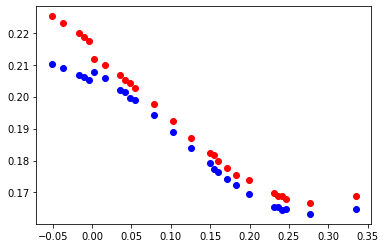

In [125]:
plt.scatter(log_Ks, real_bids_implied_vol, color='blue')
plt.scatter(log_Ks, real_asks_implied_vol, color='red')
plt.show()